# import packages

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

# Read CSV

In [2]:
odds_df = pd.read_csv("/Users/gauthamvecham/Desktop/IPL-EARLY-SIXES/data/ipl_odds_full.csv")

In [3]:
odds_df.head()

,Team 1,Team 2,Odds 1,Odds 2,Year
0,Royal Challengers Bengaluru,Punjab Kings,1.90,1.91,2025
1,Mumbai Indians,Punjab Kings,1.68,2.20,2025
2,Gujarat Titans,Mumbai Indians,2.31,1.62,2025
3,Punjab Kings,Royal Challengers Bengaluru,1.97,1.84,2025
4,Lucknow Super Giants,Royal Challengers Bengaluru,2.23,1.66,2025


In [12]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team 1  147 non-null    object 
 1   Team 2  147 non-null    object 
 2   Odds 1  147 non-null    float64
 3   Odds 2  147 non-null    float64
 4   Year    147 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 5.9+ KB


In [11]:
odds_df.describe()

,Odds 1,Odds 2,Year
count,147.000000,147.000000,147.000000
mean,1.893401,1.986667,2024.503401
std,0.425611,0.262567,0.501698
min,1.360000,1.500000,2024.000000
25%,1.705000,1.765000,2024.000000
50%,1.800000,1.990000,2025.000000
75%,2.035000,2.135000,2025.000000
max,6.240000,3.060000,2025.000000


## Step 1: Define the Hypotheses

We want to determine whether the average IPL betting odds in 2024 are statistically different from those in 2025.

This is a two-sample hypothesis test comparing the means of two independent groups (2024 and 2025).

**Null Hypothesis (H₀):**  
The mean odds in 2024 and 2025 are the same.  
μ₍₂₀₂₄₎ = μ₍₂₀₂₅₎

**Alternative Hypothesis (H₁):**  
The mean odds in 2024 and 2025 are different.  
μ₍₂₀₂₄₎ ≠ μ₍₂₀₂₅₎

We will use a two-sample t-test to evaluate this hypothesis.

## Step 2: Load and Prepare the Data

We load the IPL odds dataset and separate it by year. For each year, we combine `Odds 1` and `Odds 2` to represent all betting odds offered in that season.

This will allow us to compare the distributions of odds between 2024 and 2025.

In [13]:
# Filter data for 2024 and 2025
odds_2024 = odds_df[odds_df['Year'] == 2024]
odds_2025 = odds_df[odds_df['Year'] == 2025]

# Combine 'Odds 1' and 'Odds 2' for each year
combined_2024 = pd.concat([odds_2024['Odds 1'], odds_2024['Odds 2']], ignore_index=True)
combined_2025 = pd.concat([odds_2025['Odds 1'], odds_2025['Odds 2']], ignore_index=True)

# Preview
print("2024 Odds Sample:")
print(combined_2024.head())
print("\n2025 Odds Sample:")
print(combined_2025.head())

2024 Odds Sample:
0    1.87
1    1.79
2    2.01
3    1.95
4    1.36
dtype: float64

2025 Odds Sample:
0    1.90
1    1.68
2    2.31
3    1.97
4    2.23
dtype: float64


## Step 3A: Exploratory Data Analysis (EDA)

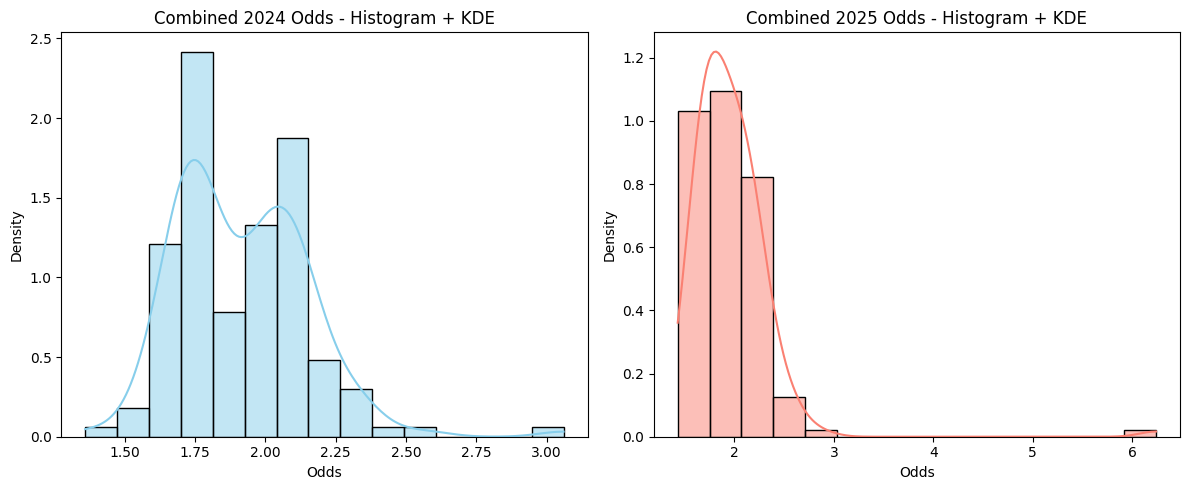

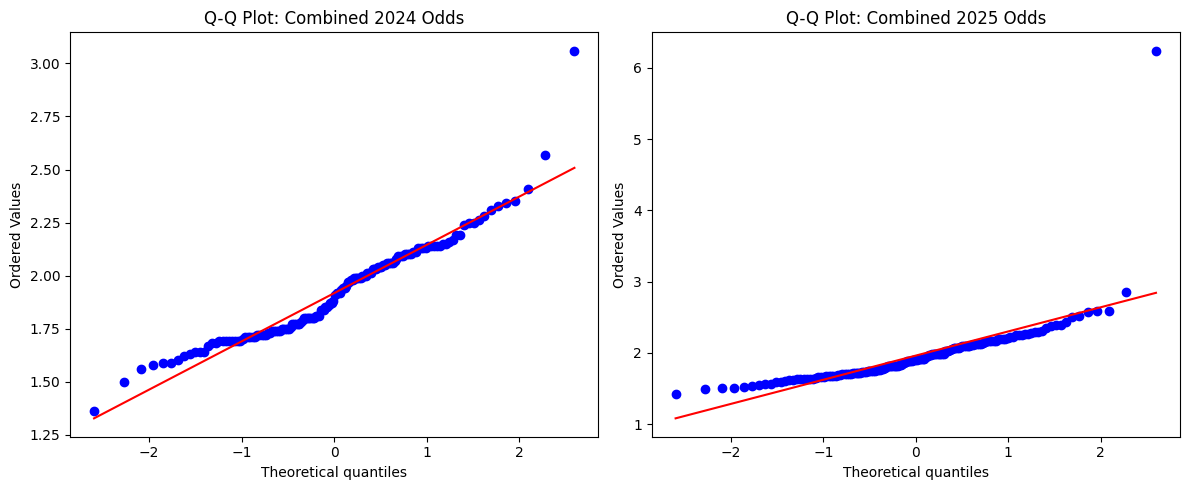

In [22]:
# Plot histograms with KDE for both combined datasets
plt.figure(figsize=(12, 5))

# combined 2024
plt.subplot(1, 2, 1)
sns.histplot(combined_2024, kde=True, color='skyblue', bins=15, stat='density')
plt.title('Combined 2024 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

# combined 2025
plt.subplot(1, 2, 2)
sns.histplot(combined_2025, kde=True, color='salmon', bins=15, stat='density')
plt.title('Combined 2025 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Q-Q Plots for both datasets
plt.figure(figsize=(12, 5))

# Q-Q Plot for 2024
plt.subplot(1, 2, 1)
stats.probplot(combined_2024, dist="norm", plot=plt)
plt.title("Q-Q Plot: Combined 2024 Odds")

# Q-Q Plot for 2025
plt.subplot(1, 2, 2)
stats.probplot(combined_2025, dist="norm", plot=plt)
plt.title("Q-Q Plot: Combined 2025 Odds")

plt.tight_layout()
plt.show()

## Visual Evidence of Outliers in Combined Odds

From the Histogram + KDE and Q-Q plots of the **combined 2024 and 2025 odds data** (before outlier removal), we observe the following:

- **2024 Odds**: Show a distribution that is roughly symmetric and close to normal, though minor deviations at the tails are present.
- **2025 Odds**: Exhibit significant **right skew**, with a few unusually high odds values stretching the distribution. The Q-Q plot confirms heavy deviation in the upper quantiles.

These observations strongly suggest the presence of **outliers**, particularly in the 2025 dataset.

To confirm this and identify the specific ranges of extreme values, we will create **box plots** for both years. This will visually highlight any outliers and guide our decision on whether to filter or adjust the data before formal hypothesis testing.

## Step 3B: Box Plot of Combined Odds (2024 vs 2025)

/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_62083/797359549.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot_df, x='Year', y='Odds', palette='pastel')


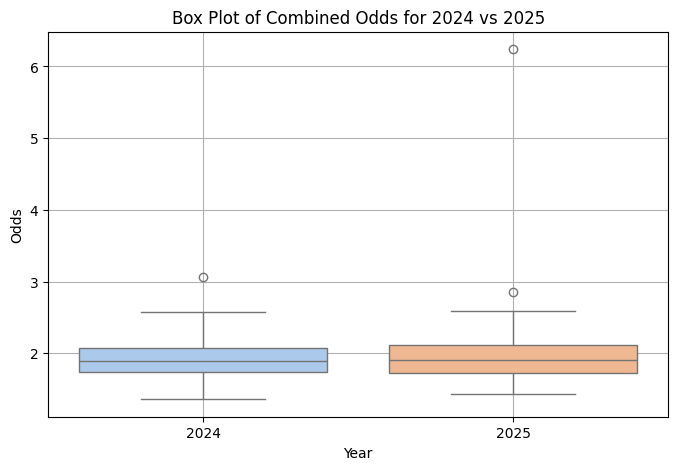

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reconstruct combined data (if needed)
combined_2024_df = pd.DataFrame({'Odds': combined_2024, 'Year': '2024'})
combined_2025_df = pd.DataFrame({'Odds': combined_2025, 'Year': '2025'})
boxplot_df = pd.concat([combined_2024_df, combined_2025_df], ignore_index=True)

# Plot box plots
plt.figure(figsize=(8, 5))
sns.boxplot(data=boxplot_df, x='Year', y='Odds', palette='pastel')
plt.title('Box Plot of Combined Odds for 2024 vs 2025')
plt.ylabel('Odds')
plt.grid(True)
plt.show()

## Step 3C: Outlier Removal and Rechecking Distribution

Based on the box plots, we confirmed the presence of outliers in both the 2024 and 2025 odds data — particularly in the 2025 dataset, which showed extreme upper values.

To reduce distortion and improve the validity of our statistical tests, we removed outliers from both years using the **Interquartile Range (IQR)** method.


In [24]:
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

# Remove outliers from both years
clean_2024 = remove_outliers_iqr(combined_2024)
clean_2025 = remove_outliers_iqr(combined_2025)

## Step 3D: Outlier Removal and Rechecking Distribution Shape

After observing clear signs of skew and extreme values in the combined 2024 and 2025 odds, we applied the **Interquartile Range (IQR)** method to remove outliers from both datasets.

To validate whether the cleaned data now aligns more closely with a normal distribution, we re-visualized both:

- **Histogram + KDE** plots
- **Q-Q (Quantile-Quantile)** plots


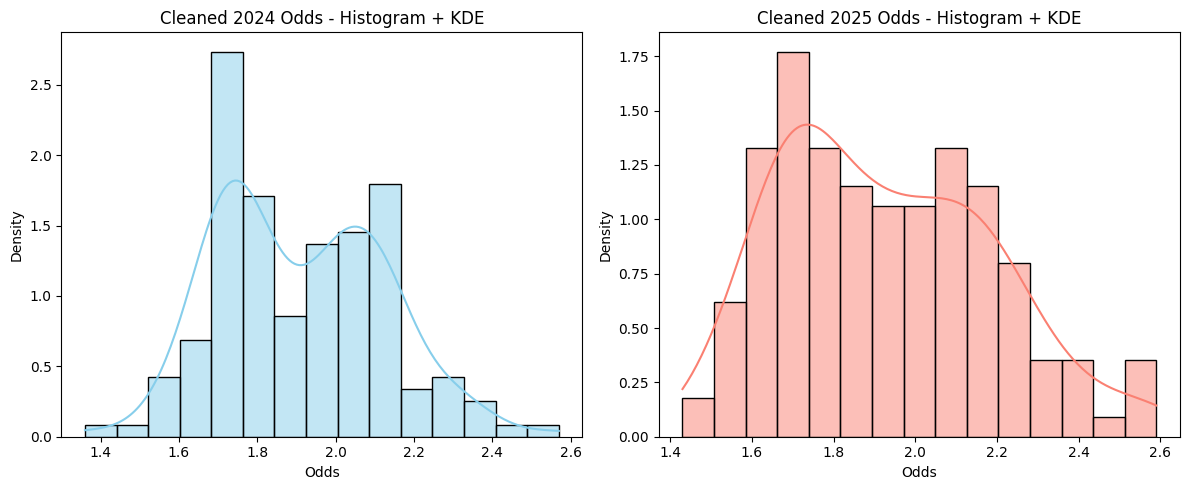

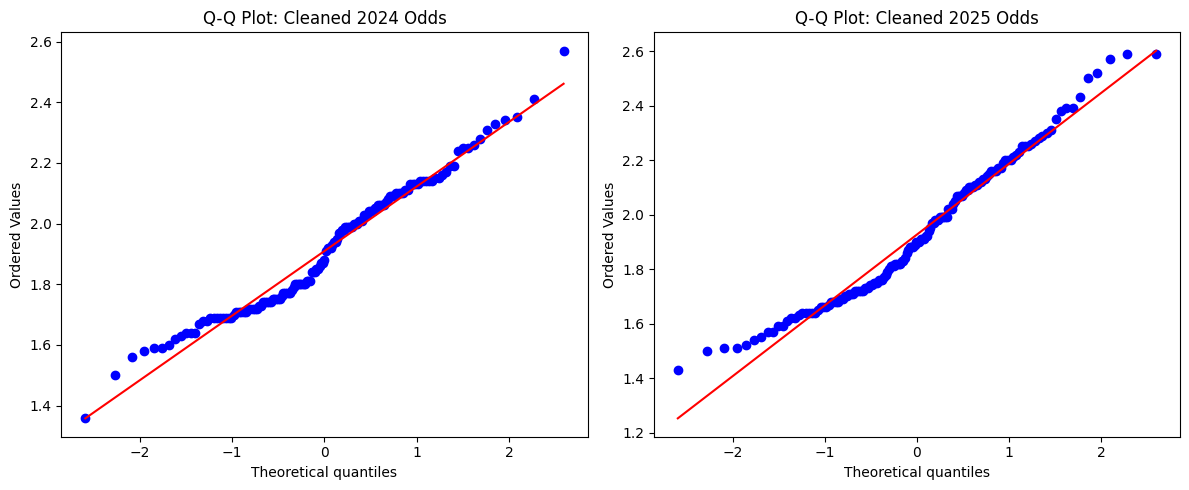

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plot histograms with KDE for both cleaned datasets
plt.figure(figsize=(12, 5))

# Cleaned 2024
plt.subplot(1, 2, 1)
sns.histplot(clean_2024, kde=True, color='skyblue', bins=15, stat='density')
plt.title('Cleaned 2024 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

# Cleaned 2025
plt.subplot(1, 2, 2)
sns.histplot(clean_2025, kde=True, color='salmon', bins=15, stat='density')
plt.title('Cleaned 2025 Odds - Histogram + KDE')
plt.xlabel('Odds')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Q-Q Plots for both datasets
plt.figure(figsize=(12, 5))

# Q-Q Plot for 2024
plt.subplot(1, 2, 1)
stats.probplot(clean_2024, dist="norm", plot=plt)
plt.title("Q-Q Plot: Cleaned 2024 Odds")

# Q-Q Plot for 2025
plt.subplot(1, 2, 2)
stats.probplot(clean_2025, dist="norm", plot=plt)
plt.title("Q-Q Plot: Cleaned 2025 Odds")

plt.tight_layout()
plt.show()


### Observations:
- The histograms show that both distributions are now more symmetric and bell-shaped.
- The Q-Q plots reveal that most data points lie close to the red reference line, with only minor deviation at the tails.

These visual checks provide reasonable evidence that the cleaned data is **approximately normal**, satisfying one of the key assumptions required for applying a **parametric t-test**.

## Step 4: Independent Two-Sample t-Test

After removing outliers, we examined the distribution of the cleaned 2024 and 2025 odds using histograms and Q-Q plots. Both distributions appeared reasonably symmetric and bell-shaped, indicating approximate normality.

Although there was some variation in spread between the two years, the visual evidence supported proceeding with a t-test to compare the means.

We now perform an independent two-sample t-test to determine whether there is a statistically significant difference in the average odds between 2024 and 2025.

### Hypotheses:
- **Null Hypothesis (H₀):** The mean odds in 2024 and 2025 are equal (μ₍₂₀₂₄₎ = μ₍₂₀₂₅₎)
- **Alternative Hypothesis (H₁):** The mean odds in 2024 and 2025 are different (μ₍₂₀₂₄₎ ≠ μ₍₂₀₂₅₎)


In [29]:
from scipy.stats import ttest_ind

# Perform two-sample independent t-test 
t_stat, p_val = ttest_ind(clean_2024, clean_2025, equal_var=True)

print("Two-Sample t-Test Result:")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value     = {p_val:.4f}")

if p_val < 0.05:
    print("Result: Statistically significant difference in mean odds (reject H₀).")
else:
    print("Result: No statistically significant difference in mean odds (fail to reject H₀).")

Two-Sample t-Test Result:
t-statistic = -0.6202
p-value     = 0.5356
Result: No statistically significant difference in mean odds (fail to reject H₀).


## Conclusion

After conducting a detailed exploratory data analysis and hypothesis testing on the IPL betting odds from 2024 and 2025, we found no statistically significant difference in the mean odds between the two years.

This conclusion is supported by:

- Visual inspection (histograms and Q-Q plots) showing approximate normality after outlier removal
- A two-sample t-test (without assuming equal variances), which resulted in a high p-value
- No meaningful difference in the average or median odds offered across the two seasons

### Final Insight:
The analysis suggests that the way odds were set by the bookmaker remained consistent between 2024 and 2025. Therefore, we can reasonably conclude that the betting odds behavior was statistically stable across both seasons.

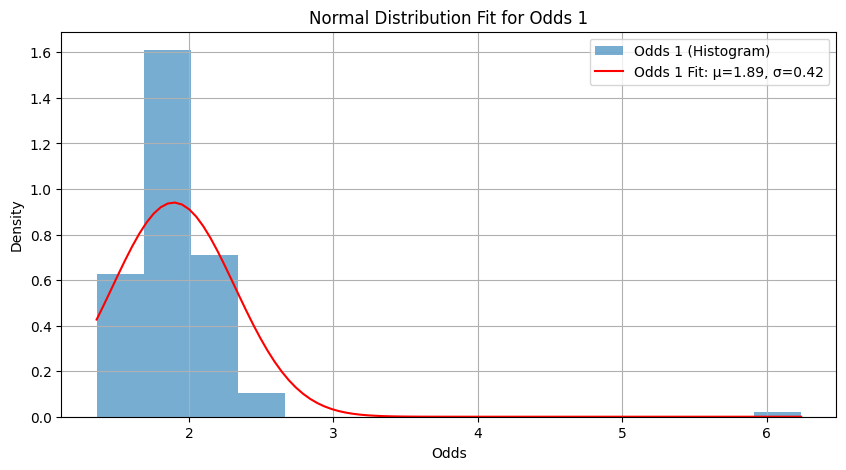

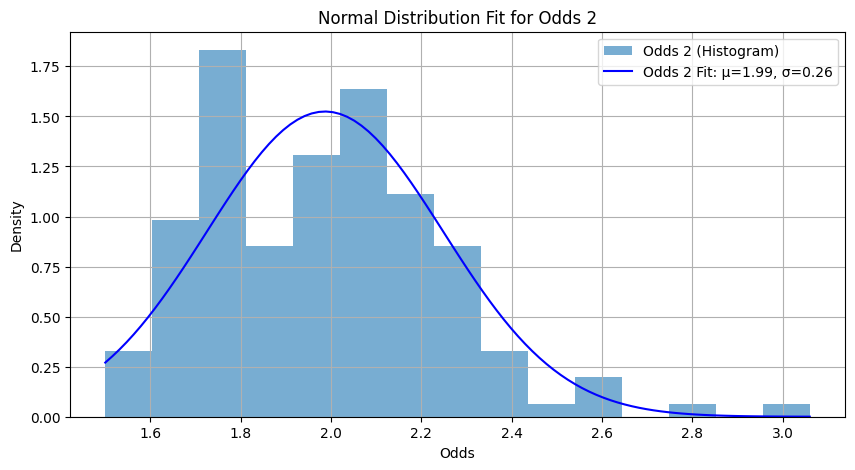

In [4]:

# Select the odds data
odds1 = odds_df['Odds 1']
odds2 = odds_df['Odds 2']

# Fit normal distributions
mean1, std1 = norm.fit(odds1)
mean2, std2 = norm.fit(odds2)

# Create x-values for plotting the PDF
x1 = np.linspace(odds1.min(), odds1.max(), 100)
x2 = np.linspace(odds2.min(), odds2.max(), 100)

# Plot Odds 1
plt.figure(figsize=(10, 5))
plt.hist(odds1, bins=15, density=True, alpha=0.6, label='Odds 1 (Histogram)')
plt.plot(x1, norm.pdf(x1, mean1, std1), 'r-', label=f'Odds 1 Fit: μ={mean1:.2f}, σ={std1:.2f}')
plt.title('Normal Distribution Fit for Odds 1')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plot Odds 2
plt.figure(figsize=(10, 5))
plt.hist(odds2, bins=15, density=True, alpha=0.6, label='Odds 2 (Histogram)')
plt.plot(x2, norm.pdf(x2, mean2, std2), 'b-', label=f'Odds 2 Fit: μ={mean2:.2f}, σ={std2:.2f}')
plt.title('Normal Distribution Fit for Odds 2')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Mean: 1.94
Median: 1.90
Standard Deviation: 0.36
Skewness: 6.23
Kurtosis: 70.81


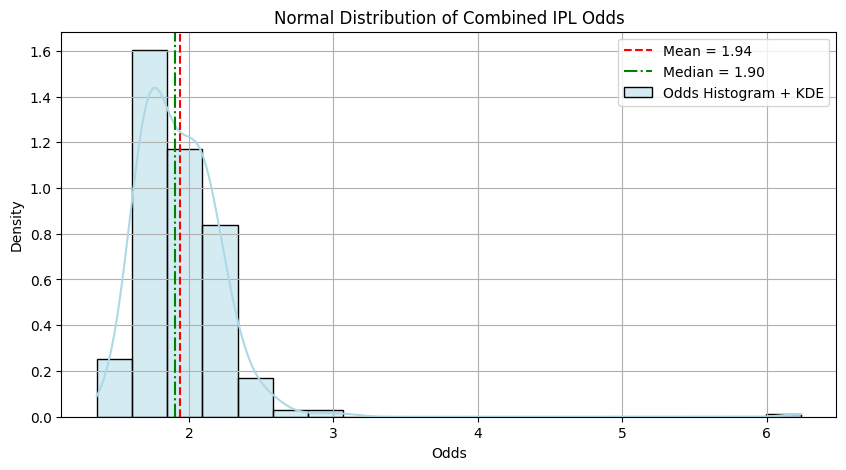

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Combine both odds columns
combined_odds = pd.concat([odds_df['Odds 1'], odds_df['Odds 2']], ignore_index=True)

# Descriptive statistics
mean_val = combined_odds.mean()
median_val = combined_odds.median()
std_val = combined_odds.std()
skew_val = skew(combined_odds)
kurtosis_val = kurtosis(combined_odds)

# Print stats
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(combined_odds, bins=20, kde=True, color='lightblue', stat='density', label='Odds Histogram + KDE')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Median = {median_val:.2f}')
plt.title('Normal Distribution of Combined IPL Odds')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

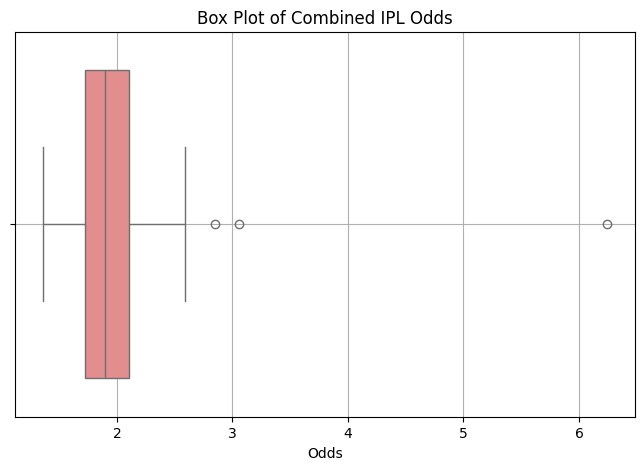

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Combine the two odds columns
combined_odds = pd.concat([odds_df['Odds 1'], odds_df['Odds 2']], ignore_index=True)

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=combined_odds, color='lightcoral')
plt.title("Box Plot of Combined IPL Odds")
plt.xlabel("Odds")
plt.grid(True)
plt.show()

Mean: 1.92
Median: 1.90
Standard Deviation: 0.24
Skewness: 0.40
Kurtosis: -0.38


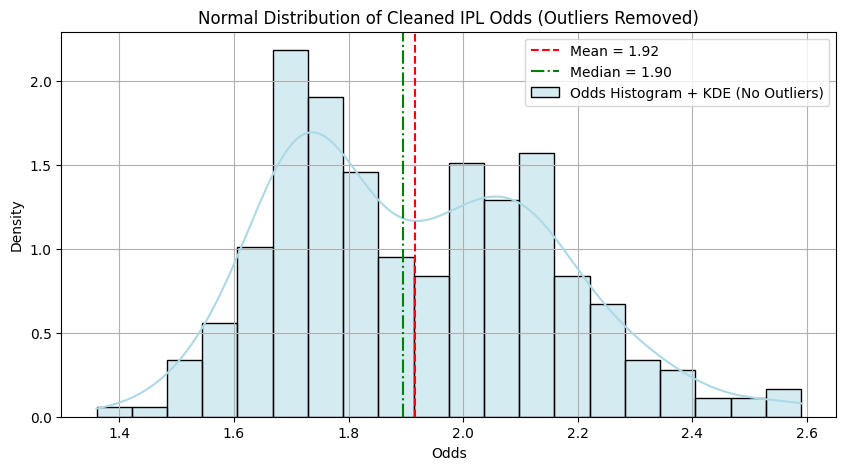

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


# Function to remove outliers using IQR
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]

# Remove outliers from each odds column
clean_odds1 = remove_outliers(odds_df['Odds 1'])
clean_odds2 = remove_outliers(odds_df['Odds 2'])

# Combine cleaned odds into one Series
combined_clean_odds = pd.concat([clean_odds1, clean_odds2], ignore_index=True)

# Descriptive statistics
mean_val = combined_clean_odds.mean()
median_val = combined_clean_odds.median()
std_val = combined_clean_odds.std()
skew_val = skew(combined_clean_odds)
kurtosis_val = kurtosis(combined_clean_odds)

# Print stats
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print(f"Skewness: {skew_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(combined_clean_odds, bins=20, kde=True, color='lightblue', stat='density', label='Odds Histogram + KDE (No Outliers)')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Median = {median_val:.2f}')
plt.title('Normal Distribution of Cleaned IPL Odds (Outliers Removed)')
plt.xlabel('Odds')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()